<a href="https://colab.research.google.com/github/Omid-Hassasfar/Qiskit_1Min/blob/main/1Min_Qiskit_Abbas(Omid)_Hassasfar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install "qiskit[all]"
!pip install qiskit[visualization]

In [5]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *
import numpy as np

---
---
# 1. How can I invert a unitary circuit?

## qc.inverse()

---
---

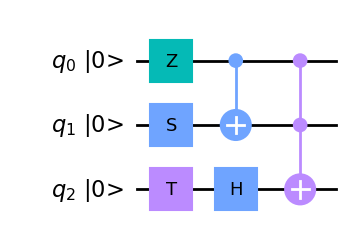

In [6]:
qc1 = QuantumCircuit(3)
qc1.z(0)
qc1.s(1)
qc1.t(2)
qc1.cx(0,1)
qc1.h(2)
qc1.ccx(0,1,2)
# This inverse method does not work if we include non-unitary parts in our circuit
# like measurment (measurment operations are not reversible), you can uncomment below line and see the error!
# qc1.measure_all()
qc1.draw(output = 'mpl' , initial_state=True)

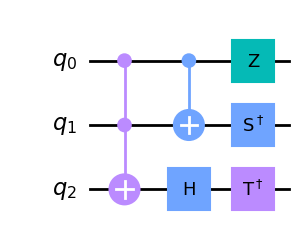

In [7]:
invers_qc1 = qc1.inverse()
invers_qc1.draw(output = 'mpl')

---
---
# 2. How do I Convert a Circuit to a Gate?

## qc.to_gate(label='MyGate')

---
---

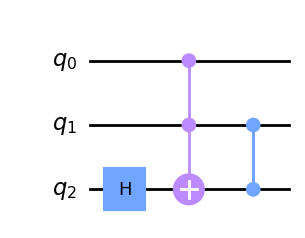

In [8]:
my_circuit = QuantumCircuit(3)
my_circuit.h(2)
my_circuit.ccx(0,1,2)
my_circuit.cz(2,1)
my_circuit.draw(output = 'mpl')

In [9]:
my_circuit

In [10]:
my_gate = my_circuit.to_gate(label='My_Gate1')
my_gate

Instruction(name='circuit-117', num_qubits=3, num_clbits=0, params=[])

In [11]:
type(my_gate)

qiskit.circuit.gate.Gate

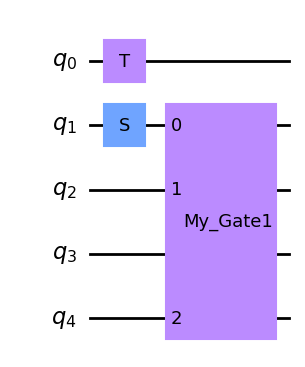

In [12]:
new_circuit = QuantumCircuit(5)
new_circuit.t(0)
new_circuit.s(1)
new_circuit.append(my_gate, [1,2,4])
new_circuit.draw(output = 'mpl')

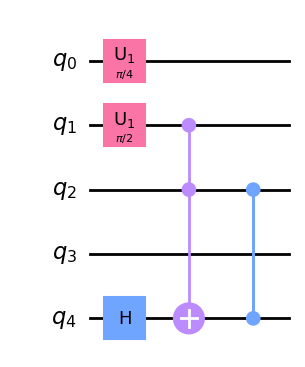

In [13]:
new_circuit.decompose().draw(output = 'mpl')

---
---
## 3. How can I Optimize a Circuit to get the Best Results on a Device?
---
---

https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html#Preset-Pass-Managers



Qiskit comes with several pre-defined pass managers, corresponding to various levels of optimization achieved through different pipelines of passes. Currently optimization_level 0 through 3 are supported; the higher the number, the more optimized it is, at the expense of more time. Choosing a good pass manager may take trial and error, as it depends heavily on the circuit being transpiled and the backend being targeted.

Here we illustrate the different levels by looking at a state synthesis circuit. We initialize four qubits to an arbitrary state, and then try to optimize the circuit that achieves this.

**optimization_level=0:** just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does).

**optimization_level=1:** maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

**optimization_level=2:** medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

**optimization_level=3:** heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

---
---
## 4. How can I Invert the Unitary Part of a Circuit?.

qc.to_gate()  
qc.inverse()

---
---

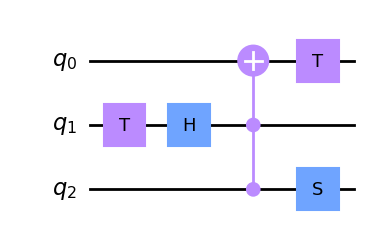

In [14]:
mycircuit_2 = QuantumCircuit(3)
mycircuit_2.t(1)
mycircuit_2.h(1)
mycircuit_2.ccx(2,1,0)
mycircuit_2.s(2)
mycircuit_2.t(0)
mycircuit_2.draw(output = 'mpl')

In [15]:
my_gate_2 = mycircuit_2.to_gate()
my_inverse_circuit_2 = my_gate_2.inverse()
my_inverse_circuit_2.name = "My Inverse Gate"

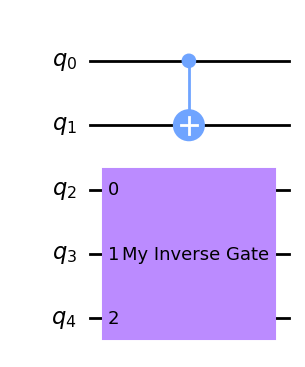

In [16]:
new_circuit_2 = QuantumCircuit(5)
new_circuit_2.cx(0,1)
new_circuit_2.append(my_inverse_circuit_2 , [2, 3, 4])
new_circuit_2.draw(output = 'mpl')

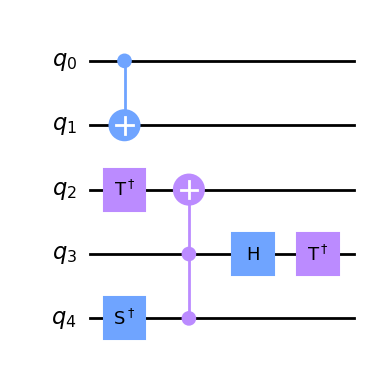

In [17]:
new_circuit_2.decompose().draw(output = 'mpl')

---
---
## 5. How can I Control the Unitary Part of a Circuit?

qc.to_gate()  
qc.control()

---
---

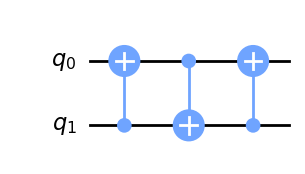

In [18]:
mycircuit_3 = QuantumCircuit(2)
mycircuit_3.cx(1,0)
mycircuit_3.cx(0,1)
mycircuit_3.cx(1,0)
mycircuit_3.draw(output = 'mpl')

In [19]:
my_gate_3 = mycircuit_3.to_gate()
my_gate_3.name = "My  Gate 3"

In [20]:
my_controlled_gate = my_gate_3.control()

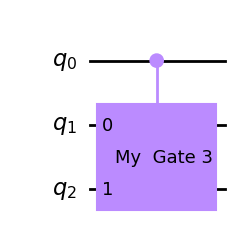

In [21]:
new_circuit_3 = QuantumCircuit(3)
new_circuit_3.append(my_controlled_gate, [0,1,2])
new_circuit_3.draw(output = 'mpl')

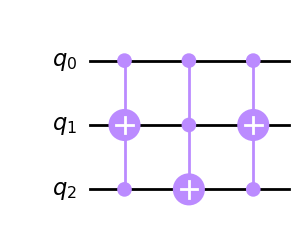

In [22]:
new_circuit_3.decompose().draw(output = 'mpl')

---
---
## 6. What is the qasm Simulator?


It is a high performance simulator with or without Noise.  
Different Simulation methods are available including State vector Density matrix,

---
---

https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.QasmSimulator.html

https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.noise.NoiseModel.html : **NoiseModel**,
This class is used to represent noise model for the QasmSimulator. It can be used to construct custom noise models for simulator, or to automatically generate a basic device noise model for an IBMQ backend.

In [23]:
from qiskit.providers.aer.noise import NoiseModel

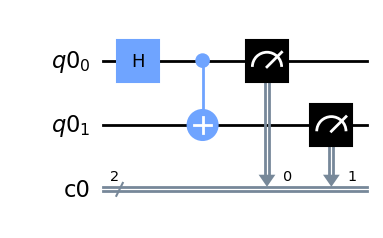

In [24]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc_real = QuantumCircuit(qreg,creg)
qc_real.h(0)
qc_real.cx(0,1)
qc_real.measure(qreg,creg)
qc_real.draw(output = 'mpl')

In [25]:
backend_sim = Aer.get_backend('qasm_simulator')
result = execute(qc_real, backend = backend_sim).result()
counts = result.get_counts(qc_real)
counts

{'11': 498, '00': 526}

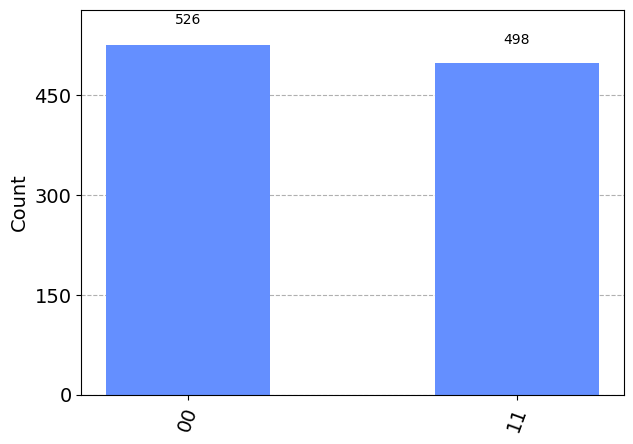

In [26]:
plot_histogram(counts)

In [27]:
from qiskit import IBMQ
IBMQ.save_account('f285955f234dab6e5269591ff655cc1fb95ebc4032f42b7826d4fc5b35f83745f537ad3a87c48a97a28ac4bec6894b529e817ea0a41f3cbbcee92257a6989beb')
provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_qasm_simulator')
# backend = provider.get_backend('ibmq_virgo')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

<ipython-input-27-6ce27cd584bd>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('f285955f234dab6e5269591ff655cc1fb95ebc4032f42b7826d4fc5b35f83745f537ad3a87c48a97a28ac4bec6894b529e817ea0a41f3cbbcee92257a6989beb')
<ipython-input-27-6ce27cd584bd>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('f285955f234dab6e5269591ff655cc1fb95ebc40

In [28]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_lima')
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

ibmqfactory.load_account:WARNING:2023-07-16 16:33:36,009: Credentials are already in use. The existing account in the session will be replaced.


NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'x', 'sx', 'cx', 'measure', 'reset']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (1, 2)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


In [29]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [30]:
lima = provider.get_backend('ibmq_lima')

In [31]:
noise_model = NoiseModel.from_backend(lima)

In [32]:
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'x', 'sx', 'cx', 'measure', 'reset']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (1, 2)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


In [33]:
transpiled_circuit = transpile(qc_real, lima, optimization_level = 3)

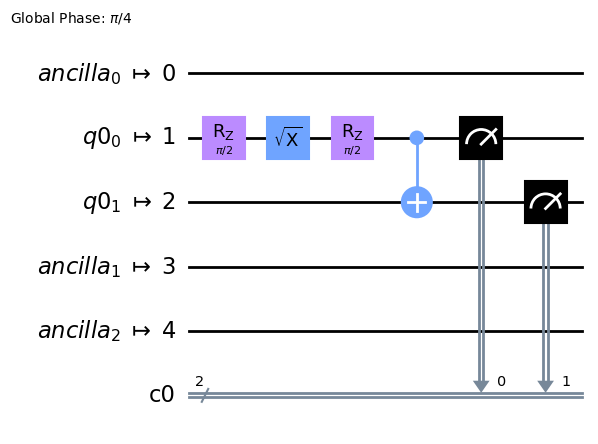

In [34]:
transpiled_circuit.draw(output = 'mpl')

In [35]:
assembled_circuit = assemble(transpiled_circuit)

In [36]:
sim_job = backend_sim.run(assembled_circuit , noise_model = noise_model)

<ipython-input-36-d40ad4636ef0>:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  sim_job = backend_sim.run(assembled_circuit , noise_model = noise_model)


In [37]:
sim_result = sim_job.result()

In [38]:
sim_counts = sim_result.get_counts()
sim_counts

{'01': 25, '11': 491, '10': 13, '00': 495}

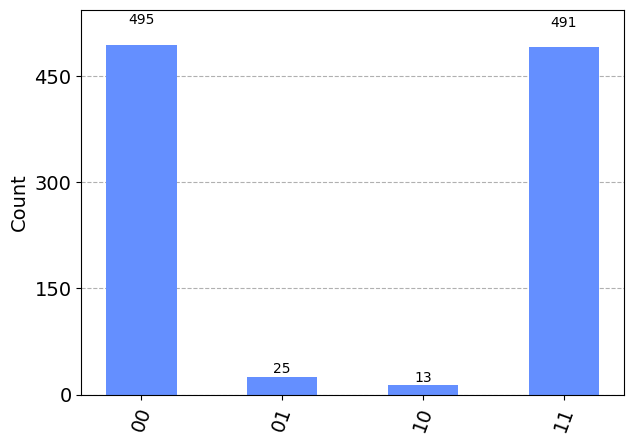

In [39]:
plot_histogram(sim_counts)

In [40]:
qcomp = provider.get_backend('ibmq_lima')

In [41]:
# real_job = lima.run(qc_real)
real_job = execute( qc_real , backend = qcomp)

In [42]:
from qiskit.tools.monitor import job_monitor

In [43]:
# job_monitor(real_job)
# real_result = real_job.result()
# real_counts = real_result.get_counts()
# plot_histogram(real_counts)

---
---
## 7. How can I Retrieve an old Job from IBM Quantum?


---
---

---
---
## 8. How can I Simulate Statevectors in Qiskit?
https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html

---
---

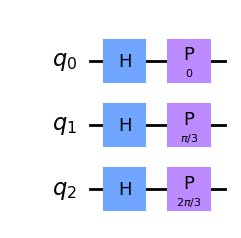

In [44]:
qc2 = QuantumCircuit(3)
for q in range(3):
    qc2.h(q)
    qc2.p(np.pi*(q/3) , q)
qc2.draw('mpl')

In [45]:
sv = Statevector.from_label('000')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [46]:
sv2 = sv.evolve(qc2)
sv2

Statevector([ 0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
              0.1767767 +3.06186218e-01j,  0.1767767 +3.06186218e-01j,
             -0.1767767 +3.06186218e-01j, -0.1767767 +3.06186218e-01j,
             -0.35355339+1.11022302e-16j, -0.35355339+1.11022302e-16j],
            dims=(2, 2, 2))


In [47]:
sv3 = sv2.data   # Change the format of statevector to NumPy array
sv3

array([ 0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
        0.1767767 +3.06186218e-01j,  0.1767767 +3.06186218e-01j,
       -0.1767767 +3.06186218e-01j, -0.1767767 +3.06186218e-01j,
       -0.35355339+1.11022302e-16j, -0.35355339+1.11022302e-16j])

---
---
## 9. How can I View Device Properties and Configuration in Qiskit?


---
---

In [48]:
from qiskit import IBMQ
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-07-16 16:33:50,153: Credentials are already in use. The existing account in the session will be replaced.


In [49]:
lima = provider.get_backend('ibmq_lima')
lima

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [50]:
lima.configuration()

In [51]:
lima.configuration().coupling_map

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [52]:
lima.properties()

In [53]:
lima.properties().t1(3)

0.00010094161932000348

In [54]:
lima.defaults()

In [55]:
lima.defaults().qubit_freq_est

[5029746586.011762,
 5127745644.230529,
 5247356900.693761,
 5302565985.536447,
 5092088263.544737]

---
---
## 10. What is Qiskit's Barrier Operation?
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.barrier.html

---
---

In [56]:
from qiskit import IBMQ, transpile,QuantumCircuit
provider = IBMQ.load_account()
lima = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2023-07-16 16:33:57,796: Credentials are already in use. The existing account in the session will be replaced.


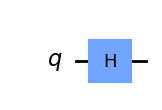

In [57]:
qc3 = QuantumCircuit(1)
qc3.h(0)
# qc3.h(0)
qc3.draw('mpl')

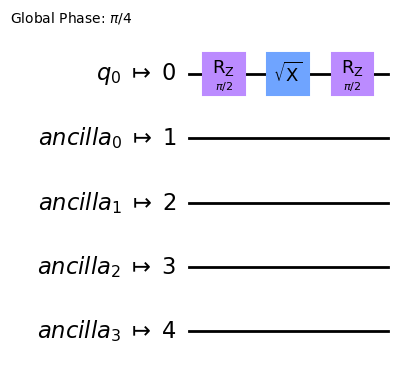

In [58]:
tr_qc = transpile(qc3 , lima)
tr_qc
tr_qc.draw('mpl')

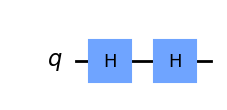

In [59]:
qc3.h(0)
qc3.draw(output='mpl')

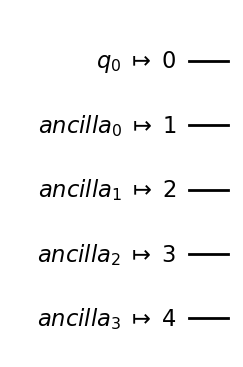

In [60]:
tr_qc1 = transpile(qc3 , lima)
tr_qc1
tr_qc1.draw('mpl')

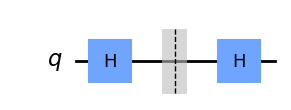

In [61]:
qc4 = QuantumCircuit(1)
qc4.h(0)
qc4.barrier()
qc4.h(0)
qc4.draw('mpl')

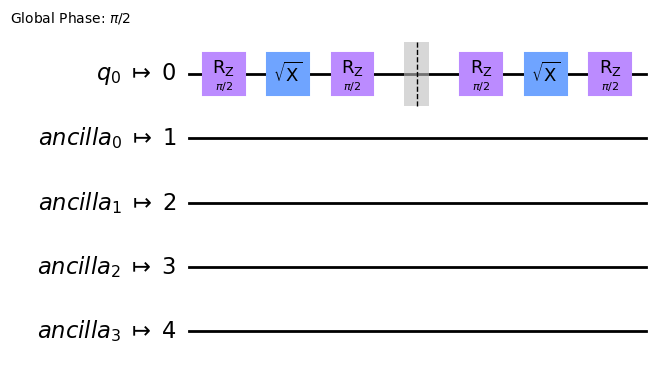

In [62]:
tr_qc2 = transpile(qc4 , lima)
tr_qc2
tr_qc2.draw('mpl')

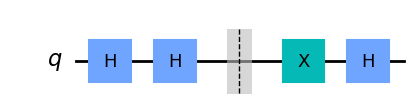

In [63]:
qc5 = QuantumCircuit(1)
qc5.h(0)
qc5.h(0)
qc5.barrier()
qc5.x(0)
qc5.h(0)
qc5.draw('mpl')

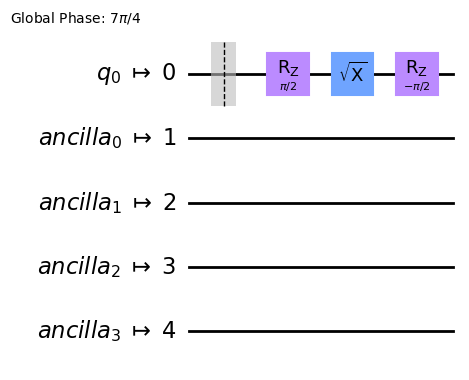

In [64]:
tr_qc3 = transpile(qc5 , lima)
tr_qc
tr_qc3.draw('mpl')

---

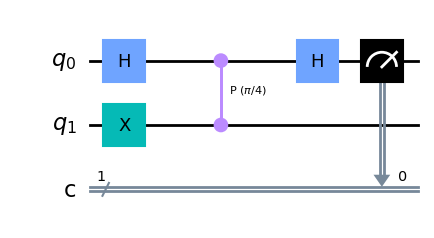

In [65]:
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeVigoV2

backend = FakeVigoV2()

qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cp(np.pi/4, 0, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw(output='mpl')

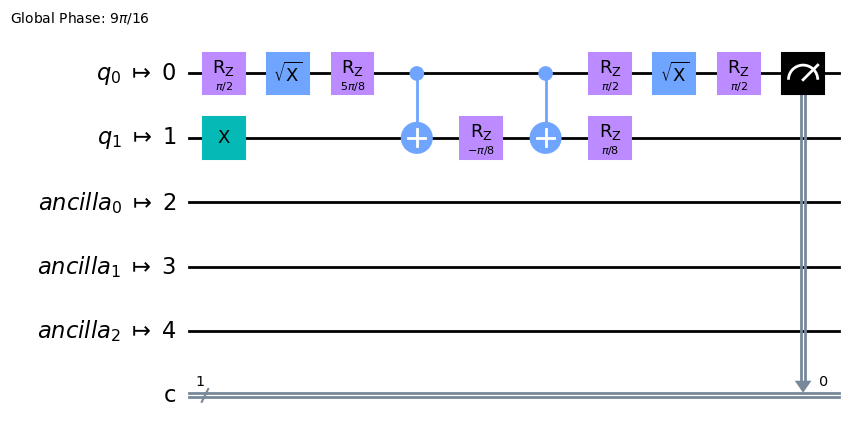

In [66]:
qc_basis = transpile(qc, backend)
qc_basis.draw(output='mpl')

---
---
## 10. How can I use Mock Backends in Qiskit?
---
---

In [67]:
from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()

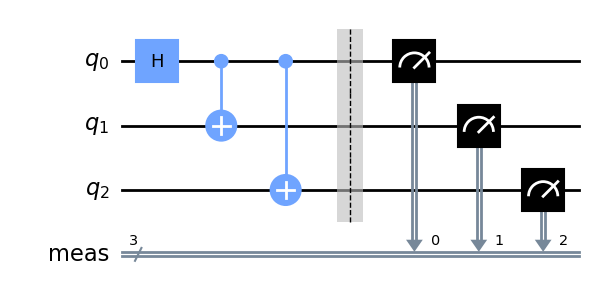

In [68]:
qc6 = QuantumCircuit(3)
qc6.h(0)
qc6.cx(0,1)
qc6.cx(0,2)
# qc6.measure([0, 1, 2], [0, 1, 2])
qc6.measure_all()
qc6.draw(output = 'mpl')

In [69]:
results = execute(qc6 , device_backend).result()

In [70]:
counts = results.get_counts()
counts

{'001': 5,
 '110': 25,
 '100': 4,
 '101': 22,
 '011': 7,
 '111': 445,
 '010': 12,
 '000': 504}

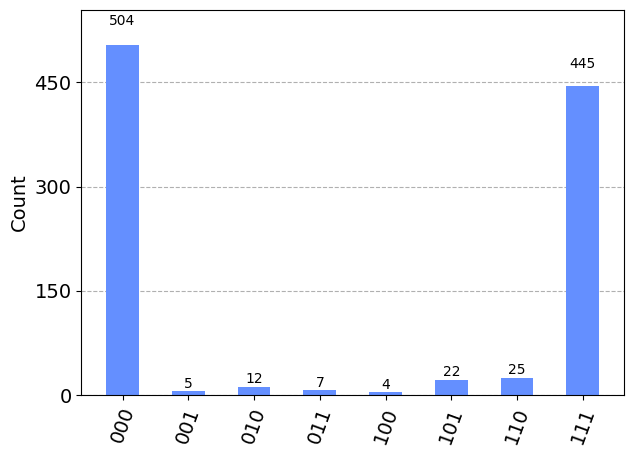

In [71]:
plot_histogram(counts)

In [72]:
from qiskit.tools.jupyter import *
FakeVigo()

<FakeVigo('fake_vigo')>

In [73]:
import qiskit.test.mock

In [74]:
for b in qiskit.test.mock.FakeProvider().backends():
    print(b.name(), b.configuration().n_qubits)

<ipython-input-74-95a3f6a91482>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  for b in qiskit.test.mock.FakeProvider().backends():


fake_almaden 20
fake_armonk 1
fake_athens 5
fake_belem 5
fake_boeblingen 20
fake_bogota 5
fake_brooklyn 65
fake_burlington 5
fake_cairo 27
fake_cambridge 28
fake_cambridge 28
fake_casablanca 7
fake_essex 5
fake_guadalupe 16
fake_hanoi 27
fake_jakarta 7
fake_johannesburg 20
fake_kolkata 27
fake_lagos 7
fake_lima 5
fake_london 5
fake_manila 5
fake_manhattan 65
fake_melbourne 14
fake_montreal 27
fake_mumbai 27
fake_nairobi 7
fake_openpulse_2q 2
fake_openpulse_3q 3
fake_ourense 5
fake_paris 27
fake_poughkeepsie 20
fake_qasm_simulator 5
fake_quito 5
fake_rochester 53
fake_rome 5
fake_rueschlikon 16
fake_santiago 5
fake_singapore 20
fake_sydney 27
fake_tenerife 5
fake_tokyo 20
fake_toronto 27
fake_valencia 5
fake_vigo 5
fake_washington 127
fake_yorktown 5


---
---
## 11. What is the qsphere?
Plot the qsphere representation of a quantum state. Here, the size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.

---
---

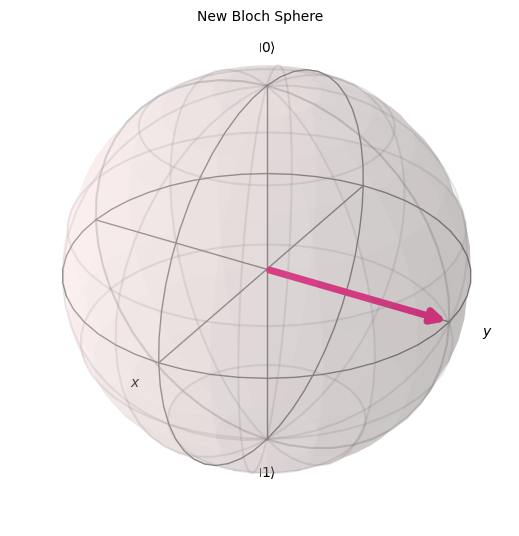

In [75]:
plot_bloch_vector([0,1,0], title="New Bloch Sphere")

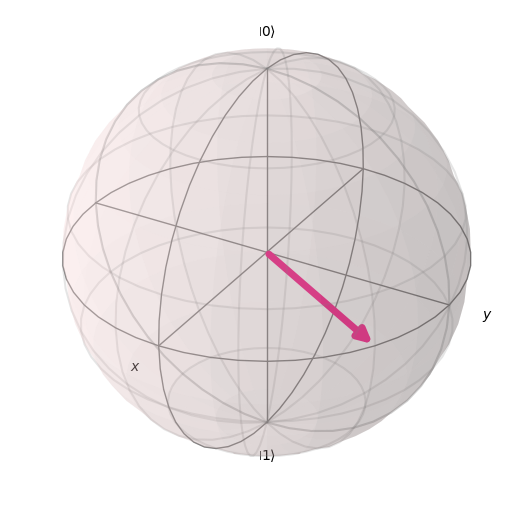

In [76]:
# You can use spherical coordinates instead of cartesian.

plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

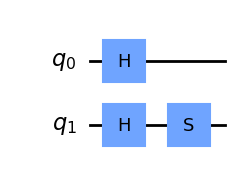

In [77]:
qc7 = QuantumCircuit(2)
qc7.h(0)
qc7.h(1)
qc7.s(1)
qc7.draw(output = 'mpl')

In [78]:
state7 = Statevector(qc7)
state7

Statevector([0.5+0.j , 0.5+0.j , 0. +0.5j, 0. +0.5j],
            dims=(2, 2))


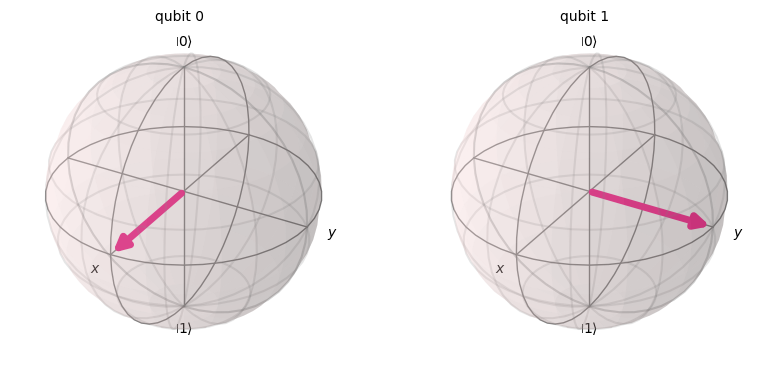

In [79]:
plot_bloch_multivector(state7)

In [80]:
sv = Statevector.from_label('00')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


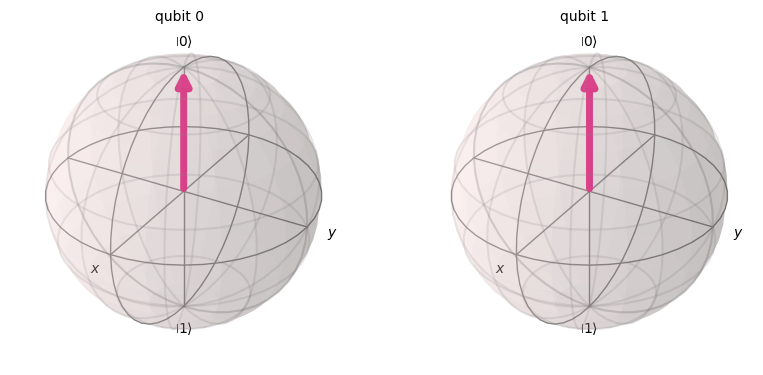

In [81]:
plot_bloch_multivector(sv)

In [82]:
sv_ev = sv.evolve(qc7)
sv_ev

Statevector([0.5+0.j , 0.5+0.j , 0. +0.5j, 0. +0.5j],
            dims=(2, 2))


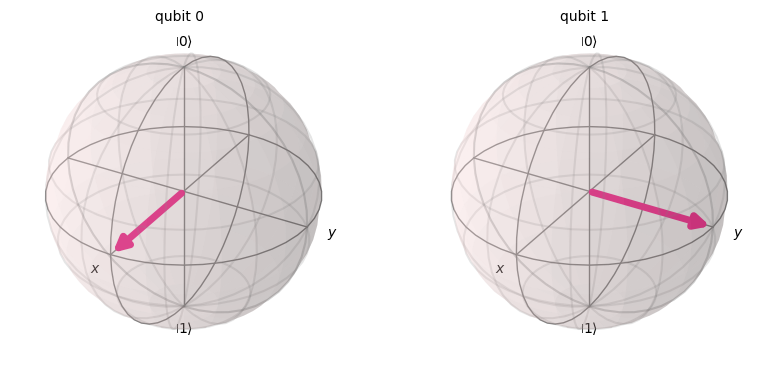

In [83]:
plot_bloch_multivector(sv_ev)

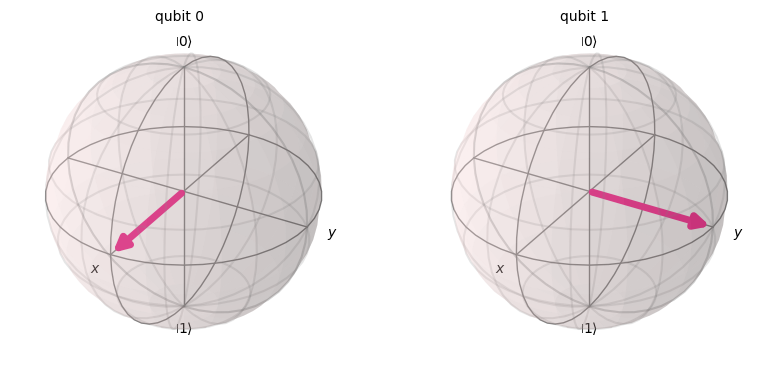

In [84]:
plot_bloch_multivector(sv_ev.data)

### Now Let's plot the Entangled state

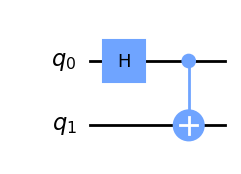

In [85]:
qc8 = QuantumCircuit(2)
qc8.h(0)
qc8.cx(0,1)
qc8.draw(output = 'mpl')

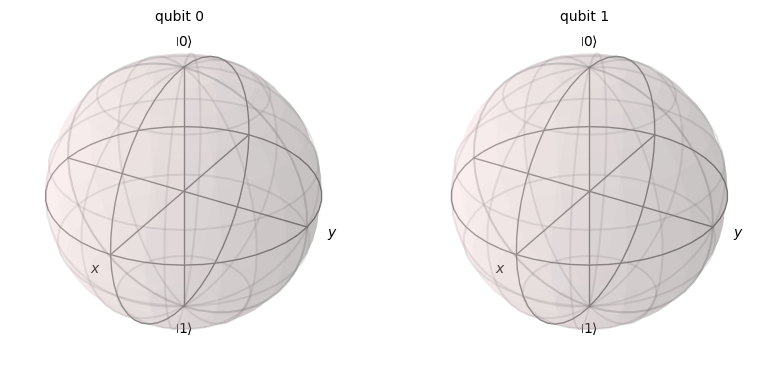

In [86]:
plot_bloch_multivector(qc8)

In [87]:
state8 = Statevector(qc8)
state8

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [88]:
state8.draw('latex')

<IPython.core.display.Latex object>

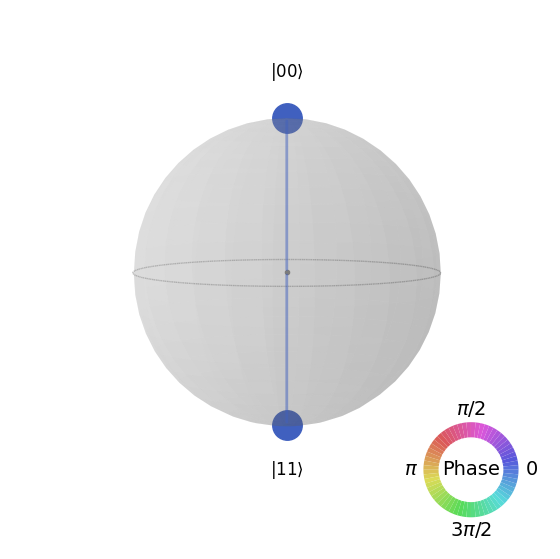

In [89]:
plot_state_qsphere(qc8)

In [90]:
state7 = Statevector(qc7)
state7

Statevector([0.5+0.j , 0.5+0.j , 0. +0.5j, 0. +0.5j],
            dims=(2, 2))


In [91]:
state7.draw('latex')

<IPython.core.display.Latex object>

In [92]:
state7.data

array([0.5+0.j , 0.5+0.j , 0. +0.5j, 0. +0.5j])

In [93]:
#Alternative way of representing in latex
array_to_latex(state7)

<IPython.core.display.Latex object>

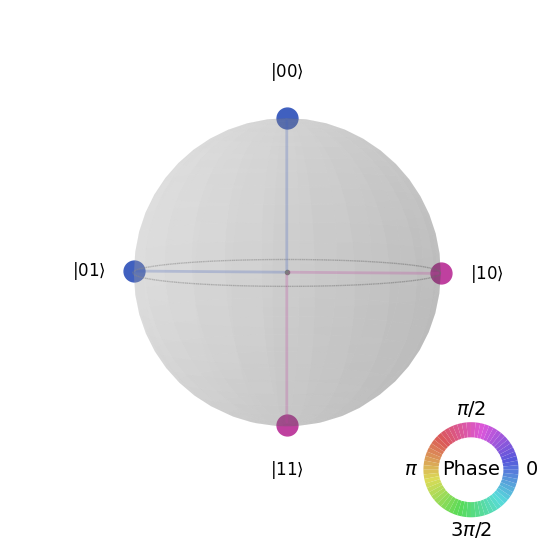

In [94]:
plot_state_qsphere(qc7)

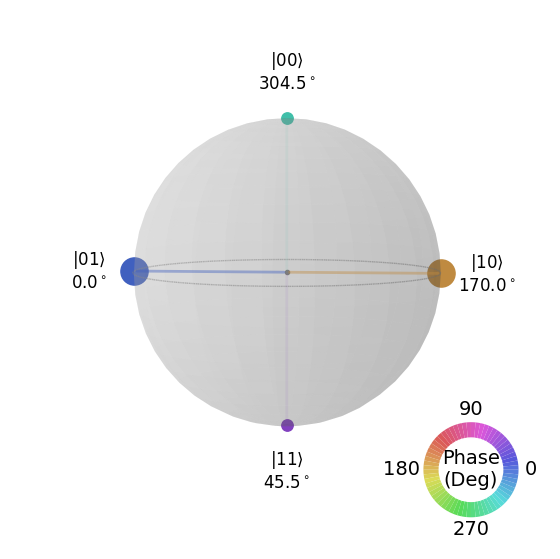

In [95]:
# You can show the phase of each state and use
# degrees instead of radians

from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
qc.z(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = True, use_degrees = True)

---
---
## 12. What is the Unitary Simulator?
---
---

In [96]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [97]:
backend = Aer.get_backend('unitary_simulator')

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.cx(q[0],q[1])

print(circuit)

job = execute(circuit, backend, shots=8192)
result = job.result()

print(result.get_unitary(circuit,3))

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


---

In [98]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image' , cmap='bone')

In [99]:
U1 = XGate()
U1

Instruction(name='x', num_qubits=1, num_clbits=0, params=[])

In [100]:
U2 = YGate()
U2

Instruction(name='y', num_qubits=1, num_clbits=0, params=[])

In [101]:
Unitary1 = U1.to_matrix()
Unitary1

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [102]:
Unitary2 = U2.to_matrix()
Unitary2

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

<Figure size 640x480 with 0 Axes>

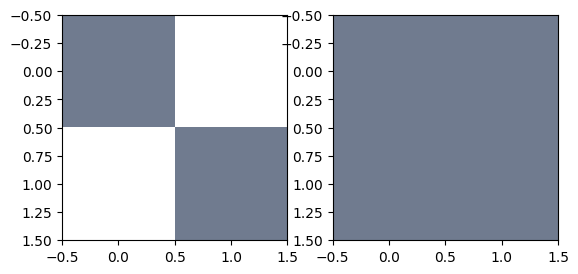

In [103]:
fig = plt.figure()
_, plots = plt.subplots(1,2)
reals = np.real(Unitary1)
images = np.imag(Unitary1)
plots[0].imshow(reals, vmin=-1 , vmax=+1)
plots[1].imshow(images, vmin=-1 , vmax=+1)

<Figure size 640x480 with 0 Axes>

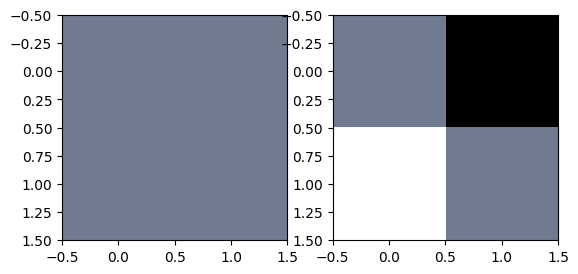

In [104]:
fig = plt.figure()
_, plots = plt.subplots(1,2)
reals = np.real(Unitary2)
images = np.imag(Unitary2)
plots[0].imshow(reals, vmin=-1 , vmax=+1)
plots[1].imshow(images, vmin=-1 , vmax=+1)

---
---
## 13. How Can I Convert a Unitary Matrix to a set of One & Two Qubit Gates?
---
---

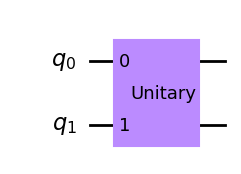

In [108]:
U = [[0, 0, 0, 1],
     [0, 0, 1, 0],
     [1, 0, 0, 0],
     [0, 1, 0, 0]]

circuit = QuantumCircuit(2)
circuit.unitary(U, [0, 1])
circuit.draw('mpl')

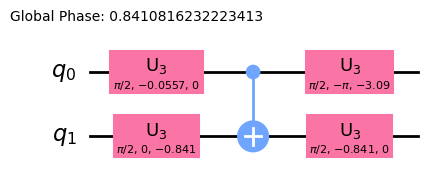

In [111]:
transpile_circuit = transpile(circuit, basis_gates = ['cx' , 'u3'])
transpile_circuit.draw('mpl')

---
---
## 14. How can I change Qiskit's default behavior?
---
---

---
---
## 15. How do I use parameterized circuits in Qiskit?
---
---

---
---
## 16. Why does Qiskit order its qubits the way it does?
---
---

---
---
## 17. How can I combine two quantum circuits?

---
---

---
---
## 18. How can I control the unitary part of a circuit?
---
---

---
---
## 19. What's the Difference Between a Gate and an Instruction?
---

---
---
## 20. How can I use a specific version of Qiskit?
---
---

---
---
## 21. How can I implement a multi control Toffoli gate?
---
---

---
---
## 22. How can I monitor a job sent to IBM Quantum?
---
---

---
---
## 23. How can I convert a quantum circuit to and from QASM?
---
---

---
---
## 24. How can I visualize quantum circuits using LaTeX?
---
---

---
---
## 25. How can I bundle several circuits into a single job?
---
---

---
---
## 26. How can I save Circuit Drawings to Different File Types?
---
---

---
---
## 27. How can I Construct a Quantum Volume Circuit?
---
---

---
---
## 28. What tricks can I do with the draw method?
---
---

---
---
## 29. How can I find reduced quantum states using Qiskit?
---
---

---
---
## 30.
---
---

---
---
## 31. How can I find reduced quantum states using Qiskit?
---
---

---
---
## 32. In What Different Ways Can I Draw a Quantum Circuit?
---
---

---
---
## 33. How Can I use a Classical Register for Quantum Computation?
---
---

---
---
## 34. What is circuit depth and how can I calculate it?
---
---

---
---
## 35. How can I choose an initial layout for the transpiler?
---
---


---
---
## 36. What are Ancillary Qubits and how are they useful?
---
---

---
---
## 37. What are registers?
---
---

---
---
## 38. How can I create a custom gate from a matrix?
---
---

---
---
## 39. How can I find the expectation value of an operator?
---
---

---
---
## 40. How Can I Measure Qubits Midway Through a Quantum Circuit?
---
---

---
---
## 41. How can I Transpile a Quantum Circuit?
---
---

---
---
## 42. How can I make a noise model with Qiskit?
---
---

---
---
## 43. How can I create a custom controlled gate?
---
---

---
---
## 44. How Can I Choose the Best Backend From a Provider?
---
---

---
---
## 45. How Can I Reset a Qubit in a Quantum Circuit?
---
---

---
---
## 46. How do I perform a non unitary projection in a quantum circuit?
---
---

---
---
## 47. How do I Debug an Issue in the Transpiler?
---
---

---
---
## 48. How can I estimate Pi using a quantum computer?
---
---

---
---
## 49. How do I Initialize Mixed States?
---
---

---
---
## 50. What is gate fidelity and how do I calculate it?
---
---

---
---
## 51. How do I check state fidelity with a noisy simulator?
---
---

---
---
## 52. How do I change the fitter algorithm in a state tomography experiment?
---
---

---
---
## 53. How do I manage lots of parameters?
---
---

---
---
## 54.  How do I remove unused qubits from a quantum circuit?
---
---

---
---

---
---

---
---
---

In [105]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright